In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV files into DataFrames
df1 = pd.read_csv('questionnaire.csv')
df2 = pd.read_csv('demographic.csv')
df3 = pd.read_csv('diet.csv')
df4 = pd.read_csv('examination.csv')

# Merge the DataFrames on the 'seqn' column
merged_df = df1.merge(df2, on='SEQN').merge(df3, on='SEQN').merge(df4, on='SEQN')

# Print the merged DataFrame
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(merged_df.shape)


C:\Users\samco\AppData\Local\Temp\ipykernel_5168\1709555822.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


(10175, 953)
(10175, 47)
(9813, 168)
(9813, 224)
(9813, 1389)


In [2]:
merged_df.isnull().sum()

SEQN           0
ACD011A     4250
ACD011B     9797
ACD011C     9649
ACD040      7506
            ... 
CSXSLTRT    8218
CSXSLTRG    8218
CSXNART     8200
CSXNARG     8200
CSAEFFRT    6276
Length: 1389, dtype: int64

In [3]:
# List of columns to keep
columns_to_keep = [
    'SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'BPXDI1', 'BPXDI3', 'BPXSY1', 'BPXSY3', 'PEASCST1', 'PEASCCT1', 'BMXBMI', 'BMXHT', 'BMXWAIST', 'BMXWT', 'BPQ080',
    'DRQSDIET', 'DRQSPREP', 'MCQ010', 'MCQ160F', 'CDQ001', 'OCQ210',
    'PAQ650', 'PAQ665', 'DPQ090', 'DPQ060', 'DPQ050', 'DPQ040', 'DPQ030', 'DPQ020','ALQ101','ALQ151', 'ALQ120Q', 'ALQ130', 'SMQ020', 'SMQ040', 'DBQ700', 'HSD010', 'SLD010H'
]

# Drop all columns except for the specified ones
merged_df = merged_df[columns_to_keep]

# Drop all rows where RIDAGEYR is less than 18
merged_df = merged_df[merged_df['RIDAGEYR'] >= 18]

merged_df.head()

,SEQN,RIAGENDR,RIDAGEYR,DMDEDUC2,BPXDI1,BPXDI3,BPXSY1,BPXSY3,PEASCST1,PEASCCT1,...,DPQ020,ALQ101,ALQ151,ALQ120Q,ALQ130,SMQ020,SMQ040,DBQ700,HSD010,SLD010H
0,73557,1,69,3.0,72.0,74.0,122.0,102.0,1,NaN,...,0.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,7.0
1,73558,1,54,3.0,62.0,42.0,156.0,156.0,1,NaN,...,0.0,1.0,1.0,7.0,4.0,1.0,2.0,3.0,4.0,9.0
2,73559,1,72,4.0,90.0,80.0,140.0,146.0,1,NaN,...,0.0,1.0,2.0,0.0,NaN,1.0,3.0,3.0,3.0,8.0
4,73561,2,73,5.0,86.0,86.0,136.0,142.0,1,NaN,...,1.0,1.0,2.0,0.0,NaN,2.0,NaN,2.0,5.0,9.0
5,73562,1,56,4.0,84.0,80.0,160.0,154.0,1,NaN,...,3.0,1.0,2.0,5.0,1.0,1.0,3.0,5.0,5.0,5.0


In [4]:
merged_df.loc[merged_df['ALQ101'] == 2, ['ALQ120Q', 'ALQ130']] = merged_df.loc[merged_df['ALQ101'] == 2, ['ALQ120Q', 'ALQ130']].fillna(0)
merged_df.loc[merged_df['ALQ101'] == 2, ['ALQ151']] = merged_df.loc[merged_df['ALQ101'] == 2, ['ALQ151']].fillna(2)

merged_df.loc[merged_df['SMQ020'] != 1, ['SMQ040']] = merged_df.loc[merged_df['SMQ020'] != 1, ['SMQ040']].fillna(3)

In [5]:
merged_df.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
DMDEDUC2     336
BPXDI1       498
BPXDI3       300
BPXSY1       498
BPXSY3       300
PEASCST1       0
PEASCCT1    5713
BMXBMI        77
BMXHT         67
BMXWAIST     337
BMXWT         64
BPQ080         0
DRQSDIET     528
DRQSPREP     528
MCQ010         0
MCQ160F      336
CDQ001      2216
OCQ210      4996
PAQ650         0
PAQ665         0
DPQ090       531
DPQ060       530
DPQ050       529
DPQ040       529
DPQ030       529
DPQ020       528
ALQ101       503
ALQ151       507
ALQ120Q      505
ALQ130      1051
SMQ020         0
SMQ040         0
DBQ700         0
HSD010       480
SLD010H        3
dtype: int64

In [6]:
merged_df.notnull().sum()

SEQN        5924
RIAGENDR    5924
RIDAGEYR    5924
DMDEDUC2    5588
BPXDI1      5426
BPXDI3      5624
BPXSY1      5426
BPXSY3      5624
PEASCST1    5924
PEASCCT1     211
BMXBMI      5847
BMXHT       5857
BMXWAIST    5587
BMXWT       5860
BPQ080      5924
DRQSDIET    5396
DRQSPREP    5396
MCQ010      5924
MCQ160F     5588
CDQ001      3708
OCQ210       928
PAQ650      5924
PAQ665      5924
DPQ090      5393
DPQ060      5394
DPQ050      5395
DPQ040      5395
DPQ030      5395
DPQ020      5396
ALQ101      5421
ALQ151      5417
ALQ120Q     5419
ALQ130      4873
SMQ020      5924
SMQ040      5924
DBQ700      5924
HSD010      5444
SLD010H     5921
dtype: int64

In [7]:
# Drop all columns with less than 2000 non-null values
merged_df = merged_df.dropna(thresh=2000, axis=1)

# Print the resulting DataFrame
print(merged_df)

       SEQN  RIAGENDR  RIDAGEYR  DMDEDUC2  BPXDI1  BPXDI3  BPXSY1  BPXSY3  \
0     73557         1        69       3.0    72.0    74.0   122.0   102.0   
1     73558         1        54       3.0    62.0    42.0   156.0   156.0   
2     73559         1        72       4.0    90.0    80.0   140.0   146.0   
4     73561         2        73       5.0    86.0    86.0   136.0   142.0   
5     73562         1        56       4.0    84.0    80.0   160.0   154.0   
...     ...       ...       ...       ...     ...     ...     ...     ...   
9804  83723         1        61       2.0     NaN    68.0     NaN   142.0   
9805  83724         1        80       3.0    70.0    66.0   164.0   168.0   
9807  83726         1        40       1.0     NaN     NaN     NaN     NaN   
9808  83727         1        26       5.0    68.0    76.0   110.0   112.0   
9810  83729         2        42       5.0    82.0    80.0   136.0   138.0   

      PEASCST1  BMXBMI  ...  DPQ020  ALQ101  ALQ151  ALQ120Q  ALQ130  SMQ02

In [8]:
# Assuming merged_df is already defined

# Count the number of rows with any null values
rows_with_nulls = merged_df.isnull().any(axis=1).sum()

# Print the number of rows with any null values
print(f"Number of rows with any null values: {rows_with_nulls}")

Number of rows with any null values: 3539


In [9]:
# Rename the columns as specified
new_column_names = {
    'SEQN': 'ID',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age',
    'BPXDI1': 'DiasBP1',
    'BPXDI3': 'DiasBP2',
    'BPXSY1': 'SysBP1',
    'BPXSY3': 'SysBP2',
    'PEASCST1': 'BPStatus',
    'BMXBMI': 'BMI',
    'BMXHT': 'Height',
    'BMXWAIST': 'Waist',
    'BMXWT': 'Weight',
    'BPQ080': 'Cholesterol',
    'DRQSDIET': 'Diet',
    'DRQSPREP': 'SaltFreq',
    'MCQ010': 'Asthema',
    'MCQ160F': 'Stroke',
    'PAQ650': 'VigActivity',
    'PAQ665': 'ModActivity',
    'DPQ090': 'FeelSuicidal',
    'DPQ060': 'FeelLetDown',
    'DPQ050': 'FeelPoorEating',
    'DPQ040': 'FeelTired',
    'DPQ030': 'SleepTroubles',
    'DPQ020': 'FeelDep',
    'ALQ151': 'AlcConsumpMoreThanXMostDays',
    'ALQ120Q': 'AlcConsumpFreq',
    'ALQ130': 'AlcConsumpAmtPerDrinkDay',
    'SMQ020': '100Cigs',
    'DBQ700': 'OvrDietHealth',
    'HSD010': 'GenHealth',
    'SLD010H': 'SleepDuringWork',
    'SMQ040': 'Smoker',
    'OCQ210': 'WorkHoursMoreThan35',
    'DMDEDUC2': 'EducationLvl'
}

merged_df.rename(columns=new_column_names, inplace=True)

# Show the first few rows to verify the changes
merged_df.head()

,ID,Gender,Age,EducationLvl,DiasBP1,DiasBP2,SysBP1,SysBP2,BPStatus,BMI,...,FeelDep,ALQ101,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork
0,73557,1,69,3.0,72.0,74.0,122.0,102.0,1,26.7,...,0.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,7.0
1,73558,1,54,3.0,62.0,42.0,156.0,156.0,1,28.6,...,0.0,1.0,1.0,7.0,4.0,1.0,2.0,3.0,4.0,9.0
2,73559,1,72,4.0,90.0,80.0,140.0,146.0,1,28.9,...,0.0,1.0,2.0,0.0,NaN,1.0,3.0,3.0,3.0,8.0
4,73561,2,73,5.0,86.0,86.0,136.0,142.0,1,19.7,...,1.0,1.0,2.0,0.0,NaN,2.0,3.0,2.0,5.0,9.0
5,73562,1,56,4.0,84.0,80.0,160.0,154.0,1,41.7,...,3.0,1.0,2.0,5.0,1.0,1.0,3.0,5.0,5.0,5.0


In [10]:
merged_df.shape

(5924, 36)

In [11]:
# Remove records where the person is under 20 years old
merged_df = merged_df[merged_df['Age'] >= 20]

# Show new shape
merged_df.shape

(5588, 36)

In [12]:
merged_df.isnull().sum()

ID                                0
Gender                            0
Age                               0
EducationLvl                      0
DiasBP1                         477
DiasBP2                         281
SysBP1                          477
SysBP2                          281
BPStatus                          0
BMI                              68
Height                           58
Waist                           318
Weight                           55
Cholesterol                       0
Diet                            502
SaltFreq                        502
Asthema                           0
Stroke                            0
CDQ001                         1880
VigActivity                       0
ModActivity                       0
FeelSuicidal                    513
FeelLetDown                     512
FeelPoorEating                  511
FeelTired                       511
SleepTroubles                   511
FeelDep                         510
ALQ101                      

In [13]:
merged_df.head(20)

,ID,Gender,Age,EducationLvl,DiasBP1,DiasBP2,SysBP1,SysBP2,BPStatus,BMI,...,FeelDep,ALQ101,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork
0,73557,1,69,3.0,72.0,74.0,122.0,102.0,1,26.7,...,0.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,7.0
1,73558,1,54,3.0,62.0,42.0,156.0,156.0,1,28.6,...,0.0,1.0,1.0,7.0,4.0,1.0,2.0,3.0,4.0,9.0
2,73559,1,72,4.0,90.0,80.0,140.0,146.0,1,28.9,...,0.0,1.0,2.0,0.0,NaN,1.0,3.0,3.0,3.0,8.0
4,73561,2,73,5.0,86.0,86.0,136.0,142.0,1,19.7,...,1.0,1.0,2.0,0.0,NaN,2.0,3.0,2.0,5.0,9.0
5,73562,1,56,4.0,84.0,80.0,160.0,154.0,1,41.7,...,3.0,1.0,2.0,5.0,1.0,1.0,3.0,5.0,5.0,5.0
7,73564,2,61,5.0,80.0,82.0,118.0,126.0,1,35.7,...,1.0,2.0,2.0,2.0,1.0,2.0,3.0,4.0,3.0,9.0
8,73566,2,56,3.0,74.0,72.0,128.0,114.0,1,26.5,...,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,6.0
9,73567,1,65,2.0,78.0,76.0,140.0,142.0,1,22.0,...,1.0,1.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,7.0
10,73568,2,26,5.0,60.0,66.0,106.0,108.0,1,20.3,...,0.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,8.0
12,73571,1,76,5.0,68.0,68.0,124.0,128.0,1,34.4,...,1.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0,3.0,6.0


In [14]:
#Add Hypertension Feature - added if either readings were high blood pressure
merged_df['Hypertension'] = ((merged_df['SysBP1'] >= 130) | (merged_df['SysBP2'] >= 130) |
                                 (merged_df['DiasBP1'] >= 80) | (merged_df['DiasBP2'] >= 80)).astype(int)
merged_df.head()

,ID,Gender,Age,EducationLvl,DiasBP1,DiasBP2,SysBP1,SysBP2,BPStatus,BMI,...,ALQ101,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork,Hypertension
0,73557,1,69,3.0,72.0,74.0,122.0,102.0,1,26.7,...,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,7.0,0
1,73558,1,54,3.0,62.0,42.0,156.0,156.0,1,28.6,...,1.0,1.0,7.0,4.0,1.0,2.0,3.0,4.0,9.0,1
2,73559,1,72,4.0,90.0,80.0,140.0,146.0,1,28.9,...,1.0,2.0,0.0,NaN,1.0,3.0,3.0,3.0,8.0,1
4,73561,2,73,5.0,86.0,86.0,136.0,142.0,1,19.7,...,1.0,2.0,0.0,NaN,2.0,3.0,2.0,5.0,9.0,1
5,73562,1,56,4.0,84.0,80.0,160.0,154.0,1,41.7,...,1.0,2.0,5.0,1.0,1.0,3.0,5.0,5.0,5.0,1


In [15]:
hypertension_count = merged_df['Hypertension'].sum()
hypertension_count/5588*100

42.41231209735147

In [16]:
def encode_yes_no_features(df, feature_names):
    for feature_name in feature_names:
        # Apply the conditions to each specified feature
        df[feature_name] = df[feature_name].apply(lambda x: 1 if x == 1 else (0 if x == 2 else np.nan))

In [17]:
yes_no_features = ['Gender', 'Asthema', 'Stroke', 'VigActivity', 'ModActivity', 'AlcConsumpMoreThanXMostDays', '100Cigs', 'Cholesterol']
encode_yes_no_features(merged_df, yes_no_features)

In [18]:
# Break up features into yes/no categories to determine records where there is a nan
new_column_names = {
    'Gender': 'Male'
}

merged_df.rename(columns=new_column_names, inplace=True)

In [19]:
merged_df.isnull().sum()

ID                                0
Male                              0
Age                               0
EducationLvl                      0
DiasBP1                         477
DiasBP2                         281
SysBP1                          477
SysBP2                          281
BPStatus                          0
BMI                              68
Height                           58
Waist                           318
Weight                           55
Cholesterol                      34
Diet                            502
SaltFreq                        502
Asthema                           5
Stroke                            5
CDQ001                         1880
VigActivity                       0
ModActivity                       0
FeelSuicidal                    513
FeelLetDown                     512
FeelPoorEating                  511
FeelTired                       511
SleepTroubles                   511
FeelDep                         510
ALQ101                      

In [20]:
#Scale features
def scale_features(df, feature_names, threshold=7):
    for feature_name in feature_names:
        # Determine the max value in the feature that is less than the threshold
        max_scale = df[feature_name][df[feature_name] < threshold].max()
        
        # Apply the scaling operation x = x / max_scale if x is less than the threshold
        df[feature_name] = df[feature_name].apply(lambda x: x / max_scale if x < threshold else np.nan)

In [21]:
def minus_one_from_feature_rating(df, feature_names):
    for feature_name in feature_names:
        df[feature_name] = df[feature_name] -1

In [22]:
features_to_minus_one = ['SaltFreq', 'OvrDietHealth', 'GenHealth', 'Smoker', 'EducationLvl']
minus_one_from_feature_rating(merged_df, features_to_minus_one)

In [23]:
features_to_scale = ['FeelSuicidal', 'FeelLetDown', 'FeelPoorEating','FeelTired','SleepTroubles','FeelDep', 'SaltFreq','OvrDietHealth', 'GenHealth', 'Smoker', 'EducationLvl']
scale_features(merged_df, features_to_scale)

In [24]:
features_to_scale = ['AlcConsumpFreq', 'AlcConsumpAmtPerDrinkDay']
scale_features(merged_df, features_to_scale, threshold=777)

features_to_scale = ['SleepDuringWork']
scale_features(merged_df, features_to_scale, threshold=77)

In [25]:
def flip_feature_scaling(df, feature_names):
    for feature_name in feature_names:
        df[feature_name] = 1 - df[feature_name]

In [26]:
features_to_flip = ['OvrDietHealth', 'GenHealth', 'Smoker']
flip_feature_scaling(merged_df, features_to_flip)

In [27]:
def print_feature_min_max(df, feature_names):
    for feature_name in feature_names:
        # Calculate minimum and maximum values for the feature
        min_value = df[feature_name].min()
        max_value = df[feature_name].max()
        
        # Print the results
        print(f"Minimum value for {feature_name}: {min_value}")
        print(f"Maximum value for {feature_name}: {max_value}")

In [28]:
max_min_features = ['Male', 'Asthema', 'Stroke', 'VigActivity', 'ModActivity', 'AlcConsumpMoreThanXMostDays', '100Cigs', 'Smoker', 'FeelTired','SleepTroubles','FeelDep', 'SaltFreq', 'OvrDietHealth', 'GenHealth']
print_feature_min_max(merged_df, max_min_features)

Minimum value for Male: 0
Maximum value for Male: 1
Minimum value for Asthema: 0.0
Maximum value for Asthema: 1.0
Minimum value for Stroke: 0.0
Maximum value for Stroke: 1.0
Minimum value for VigActivity: 0
Maximum value for VigActivity: 1
Minimum value for ModActivity: 0
Maximum value for ModActivity: 1
Minimum value for AlcConsumpMoreThanXMostDays: 0.0
Maximum value for AlcConsumpMoreThanXMostDays: 1.0
Minimum value for 100Cigs: 0.0
Maximum value for 100Cigs: 1.0
Minimum value for Smoker: 0.0
Maximum value for Smoker: 1.0
Minimum value for FeelTired: 0.0
Maximum value for FeelTired: 1.0
Minimum value for SleepTroubles: 0.0
Maximum value for SleepTroubles: 1.0
Minimum value for FeelDep: 0.0
Maximum value for FeelDep: 1.0
Minimum value for SaltFreq: 0.0
Maximum value for SaltFreq: 1.0
Minimum value for OvrDietHealth: 0.0
Maximum value for OvrDietHealth: 1.0
Minimum value for GenHealth: 0.0
Maximum value for GenHealth: 1.0


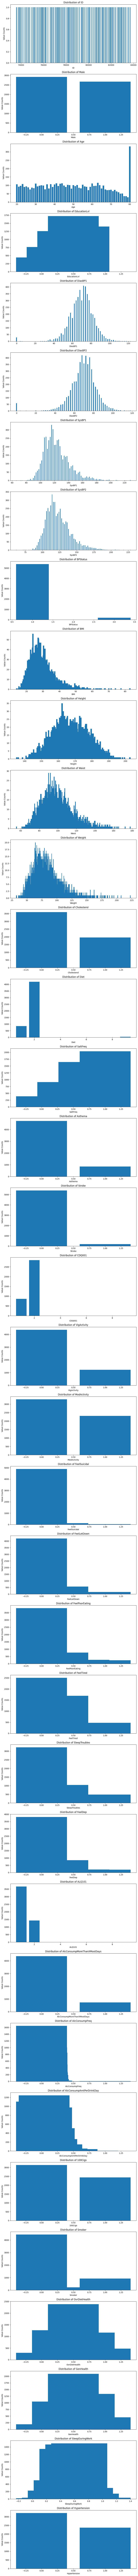

In [29]:
# List of features to plot
features = merged_df.columns

# Create subplots
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

# Plot each feature's value counts
for i, feature in enumerate(features):
    value_counts = merged_df[feature].value_counts()
    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Value Counts')
    axes[i].set_title(f'Distribution of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

In [30]:
# Drop the specified columns
merged_df.drop(columns=['CDQ001', 'ALQ101', 'FeelLetDown', 'FeelSuicidal', 'FeelPoorEating', 'BPStatus', 'ID'], inplace=True)

# Set all null values for the 'Smoker' column to 0
merged_df['Smoker'].fillna(0, inplace=True)

C:\Users\samco\AppData\Local\Temp\ipykernel_5168\3068012130.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Smoker'].fillna(0, inplace=True)


In [31]:
# Remove rows that do not contain either DiasBP1 and SysBP1 or DiasBP2 and SysBP2
condition = ((merged_df['DiasBP1'].isnull()) | (merged_df['SysBP1'].isnull())) & ((merged_df['DiasBP2'].isnull()) | (merged_df['SysBP2'].isnull()))
merged_df = merged_df.drop(merged_df[condition].index)

In [32]:
merged_df.isnull().sum()

Male                             0
Age                              0
EducationLvl                     4
DiasBP1                        269
DiasBP2                         73
SysBP1                         269
SysBP2                          73
BMI                             53
Height                          44
Waist                          262
Weight                          41
Cholesterol                     29
Diet                           420
SaltFreq                       527
Asthema                          5
Stroke                           5
VigActivity                      0
ModActivity                      0
FeelTired                      450
SleepTroubles                  450
FeelDep                        454
AlcConsumpMoreThanXMostDays    431
AlcConsumpFreq                 432
AlcConsumpAmtPerDrinkDay       955
100Cigs                          2
Smoker                           0
OvrDietHealth                    1
GenHealth                      406
SleepDuringWork     

In [33]:
# Drop all rows where BMI is missing
merged_df.dropna(subset=['BMI'], inplace=True)

In [34]:
# Create a new DataFrame by copying merged_df
copy_df = merged_df.copy()

# Drop SysBP and DiasBP columns
copy_df.drop(columns=['SysBP1', 'SysBP2', 'DiasBP1', 'DiasBP2'], inplace=True)

# Print out all columns where BMI is null but Height and Weight are not null
print(copy_df[merged_df['BMI'].isnull() & copy_df['Height'].notnull() & copy_df['Weight'].notnull()])

Empty DataFrame
Columns: [Male, Age, EducationLvl, BMI, Height, Waist, Weight, Cholesterol, Diet, SaltFreq, Asthema, Stroke, VigActivity, ModActivity, FeelTired, SleepTroubles, FeelDep, AlcConsumpMoreThanXMostDays, AlcConsumpFreq, AlcConsumpAmtPerDrinkDay, 100Cigs, Smoker, OvrDietHealth, GenHealth, SleepDuringWork, Hypertension]
Index: []

[0 rows x 26 columns]


In [35]:
# Total number of records
total_records = len(merged_df)

# Number of records with no nulls
no_nulls = merged_df.dropna().shape[0]

# Number of records with nulls
with_nulls = total_records - no_nulls

print(f"Total records: {total_records}")
print(f"Records with no nulls: {no_nulls}")
print(f"Records with nulls: {with_nulls}")

Total records: 5327
Records with no nulls: 3760
Records with nulls: 1567
